<div style="position: relative; text-align: right;">
<img src="https://user-images.githubusercontent.com/7065401/98614301-dcf01780-22d6-11eb-9c8f-65ebfceac6f6.png" style="width: 130px; display: inline-block;"></img>

<img src="https://user-images.githubusercontent.com/7065401/98864025-08deda80-2448-11eb-9600-22aa17884cdf.png" style="height: 100%; max-height: inherit; position: absolute; top: 20%; left: 0px;"></img>
<br>

<h2 style="font-weight: bold;">
    Kristin Day
</h2>

<h3 style="color: #ef7d22; margin-top: 0.8em">
    Data Scientist
</h3>
<hr>
<br><br>

<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    yokristinday@gmail.com
</p>
<p style="font-size: 80%; text-align: right; margin: 10px 0px;">
    linkedin.com/in/kristin-day-300306a9
</p>

</div>

<br><br><br>

<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98728503-5ab82f80-2378-11eb-9c79-adeb308fc647.png"></img>

<h1 style="color: white; position: absolute; top:30%; left:10%;">
    Ensembles & Random Forests
</h1>

<h3 style="color: #ef7d22; font-weight: normal; position: absolute; top:43%; left:10%;">
    Kristin Day
</h3>
</div>

<div style="width: 100%; background-color: #222; text-align: center">
<br><br>

<h1 style="color: white; font-weight: bold;">
    Project
</h1>
    
<h3 style="color: #ef7d22; font-weight: normal;">
    XGBoost Wine Model Explanation
</h3>

<br><br> 
</div>

![orange-divider](https://user-images.githubusercontent.com/7065401/98619088-44ab6000-22e1-11eb-8f6d-5532e68ab274.png)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Import installed packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

# Import sklearn packages
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import Normalizer,StandardScaler

# Import xgboost packages
import xgboost as xgb
from xgboost import XGBClassifier

In [3]:
# Load the wine dataset from Scikit-Learn
data = load_wine()

In [12]:
# Use the built-in attribute to describe the data
for line in data.DESCR.split('\n'):
    print(line)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [13]:
# Put the data in a dataframe and have a look at it
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target

# Show the first 5 rows of data
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
# Split the data into train and validate (this is a toy set and really to small for text and validate)
X_train, X_val, y_train, y_val = train_test_split(data.data, data.target, random_state=42)

In [16]:
# Because all of the features are continuous, and because XGBoost uses some linear techniques . . .
# This data will likely benefit from standardization and transformation (see feature engineering course for more on this)
# Normalize and Scale numeric data

# Instantiate the normalizer
norm = Normalizer()

# Instantiate the standard scaler
scaler = StandardScaler()

# Normalize the train data
X_train_norm = norm.fit_transform(X_train)
# Scale the normalized train data
X_train_scaled = scaler.fit_transform(X_train_norm)

# Normalize the validation data
X_val_norm = norm.transform(X_val)
# Scale the normalized validation data
X_val_scaled = scaler.transform(X_val_norm)

In [18]:
# In order to see feature names later, we'll put our data into xgboost.DMatrix
# Load the scaled train data into xgb.DMatrix with feature names
dtrain = xgb.DMatrix(X_train_scaled,label=y_train,feature_names=data.feature_names)
# Load the scaled validation data into xgb.DMatrix with feature names
dval = xgb.DMatrix(X_val_scaled,label=y_val,feature_names=data.feature_names)

In [19]:
# Use these parameters to train an xgboost model
params = {
    'max_depth': 3,  # the maximum depth of each tree
    'eta': 0.01,  # the training step for each iteration
    'silent': 0,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 3}  # the number of classes that exist in this datset
num_rounds = 20  # the number of training iterations

# Train the model using the DMatrix train data
model = xgb.train(params,dtrain,num_rounds)

[13:33:54] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:33:54] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [20]:
# Get the predictions on the training data and save the prediction with highest confidence to an array
y_train_pred = np.asarray([np.argmax(line) for line in model.predict(dtrain)])
# Get the predictions on the validation data and save the prediction with highest confidence to an array
y_val_pred = np.asarray([np.argmax(line) for line in model.predict(dval)])

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

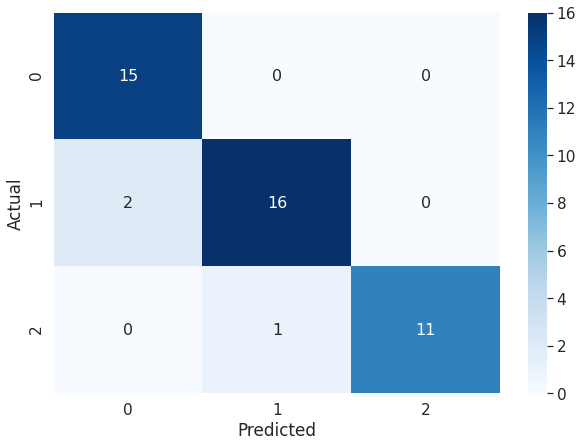

In [21]:
# Use a seaborn heatmap to visualize the categorical accuracy on the test set
# How is our model really performing?

# Put the validation data and prediction into an sklearn confusion matrix
cm = confusion_matrix(y_val,y_val_pred)


# Create a dataframe from the confusion matrix
df_cm = pd.DataFrame(cm, columns=np.unique(y_val), index = np.unique(y_val))
# Add a label to the y-axis of Actual (hint: this is the data frame index)
df_cm.index.name = 'Actual'
# Add a label to the x-axis of Predicted (hint: this is the data frame columns)
df_cm.columns.name = 'Predicted'
# Create the heatmap plot
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

## How are XGBoost feature importances calculated?
It depends.  
By default, **"gain"** is used.  But there are several other options:
* gain - essentially the same thing as measuring decrease in impurity
* cover - calculating the number of observations impacted by a feature
* weight or frequency - counting the number of times a feature is used in a split (not recommended)

In [22]:
# Use the built-in XGBoost feature importance method
# Create lists to hold features and importances
features = list()
importances = list()

# Loop through the model scores and append the feature names and importance scores to the respective lists
for k,v in model.get_score(importance_type='gain').items():
    features.append(k)
    importances.append(v)
    
# For easier viewing, put the features and their importances in a dataframe
df_feat_imps = pd.DataFrame()
df_feat_imps['feat'] = features
df_feat_imps['importance'] = importances
# Sort the dataframe based on the importance scores so that the highest are at the top
df_feat_imps = df_feat_imps.sort_values('importance',ascending=False)
# View the data frame
df_feat_imps

['hue',
 'alcalinity_of_ash',
 'flavanoids',
 'color_intensity',
 'magnesium',
 'proanthocyanins',
 'od280/od315_of_diluted_wines',
 'malic_acid']

In [23]:
# Scikit-Learn calculation based on validation data
# Requires an xgboost object that uses .fit (can't be a booster)

# Create a new xgboost model with these parameters
best_params = {'subsample': 1.0,
                 'n_estimators': 1000,
                 'max_depth': 10,
                 'learning_rate': 0.01,
                 'gamma': 1,
                 'colsample_bytree': 0.8}

xgb_model = XGBClassifier(
    verbose=True,
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample'],
    max_depth=best_params['max_depth'],
    colsample_bytree=best_params['colsample_bytree'],
    gamma=best_params['gamma']
)

# Fit the classifier on scaled train data
xgb_model.fit(X_train_scaled,y_train)
# Get the train score
xgb_model.score(X_train_scaled,y_train)

[13:35:19] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[13:35:19] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


1.0

In [24]:
# Get the validation score
xgb_model.score(X_val_scaled,y_val)

0.9555555555555556

In [25]:
# Get the Scikit-Learn permutation importance on validation data
# Create a list to hold the most important features
pi_val_list = list()
# Get the permutation importances
r = permutation_importance(xgb_model, X_val_scaled, y_val,
                            n_repeats=30, # Number of times the feat will be shuffled
                            random_state=42)

# Loop through the importances and append to the list you created above
# (optional: print out the feature names and importances as you loop)
for idx in r.importances_mean.argsort()[::-1]:
    print(f"{data.feature_names[idx]:<8}"
           f" {r.importances_mean[idx]:.3f}"
           f" +/- {r.importances_std[idx]:.3f}")
    pi_val_list.append(data.feature_names[idx])

flavanoids 0.093 +/- 0.029
color_intensity 0.056 +/- 0.030
alcalinity_of_ash 0.041 +/- 0.026
hue      0.033 +/- 0.034
od280/od315_of_diluted_wines 0.016 +/- 0.017
alcohol  0.012 +/- 0.011
nonflavanoid_phenols 0.008 +/- 0.011
proline  0.000 +/- 0.000
total_phenols 0.000 +/- 0.000
ash      0.000 +/- 0.000
malic_acid 0.000 +/- 0.000
proanthocyanins -0.002 +/- 0.012
magnesium -0.007 +/- 0.010


In [26]:
# Scikit-Learn calculation based on train data
# Create a list to hold importance values
pi_train_list = list()
# Get the permutation importance scores
r = permutation_importance(xgb_model, X_train_scaled, y_train,
                            n_repeats=30,
                            random_state=42)

# Loop through the scores and append them to the list you created above
for idx in r.importances_mean.argsort()[::-1]:
    print(f"{data.feature_names[idx]:<8}"
           f" {r.importances_mean[idx]:.3f}"
           f" +/- {r.importances_std[idx]:.3f}")
    pi_train_list.append(data.feature_names[idx])

flavanoids 0.080 +/- 0.016
alcalinity_of_ash 0.059 +/- 0.017
color_intensity 0.057 +/- 0.016
hue      0.051 +/- 0.013
proline  0.000 +/- 0.000
od280/od315_of_diluted_wines 0.000 +/- 0.000
proanthocyanins 0.000 +/- 0.000
nonflavanoid_phenols 0.000 +/- 0.000
total_phenols 0.000 +/- 0.000
magnesium 0.000 +/- 0.000
ash      0.000 +/- 0.000
malic_acid 0.000 +/- 0.000
alcohol  0.000 +/- 0.000


In [27]:
# For an easier way to compare the importances in order. . .
# Put the results of the three methods into a data frame
# Create an empty data frame
df_feat = pd.DataFrame()
# Add the top five features from the xgb built-in method
df_feat['xgb_best'] = xgb_list[:5]
# Add the top five features from sklearn permutation importance on train data
df_feat['perm_imp_train'] = pi_train_list[:5]
# Add the top five features from sklearn permutation importance on validation data
df_feat['perm_imp_val'] = pi_val_list[:5]
# View the data frame
df_feat

,xgb_best,perm_imp_train,perm_imp_val
0,hue,flavanoids,flavanoids
1,alcalinity_of_ash,alcalinity_of_ash,color_intensity
2,flavanoids,color_intensity,alcalinity_of_ash
3,color_intensity,hue,hue
4,magnesium,proline,od280/od315_of_diluted_wines


# What might you understand about the features from the data frame above?
Because the model overfit on the training data (100% accuracy), and because proline appear in the most important training features, but not in the most important validation features, it is possible that proline is erroneously considered important to the model.  I would try removing this feature to see how the model performs without it in one iteration.

<div style="position: relative;">
<img src="https://user-images.githubusercontent.com/7065401/98729912-57be3e80-237a-11eb-80e4-233ac344b391.png"></img>
</div>